In [65]:
#created and edited by Samuel Phillips
#Simulated Data : Assignment 5 Part 2

#imports for data, classes and more
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter, defaultdict
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestCentroid

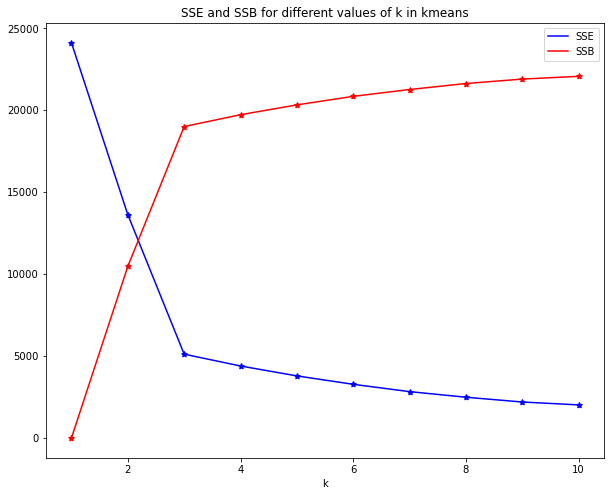

In [66]:
#Simulated Data is read in
data = pd.read_csv('simulated-data.csv')
df = pd.DataFrame(data, columns=['X1','X2'])
k = [1,2,3,4,5,6,7,8,9,10]
kSSE, kSSB = [], []

# --kmeans--
#kmeans sse
for x in k:
    #data is fitted
    k_means = cluster.KMeans(n_clusters=x).fit(df)
    
    #centroids are identified and then the lengths are gathered
    centroids = k_means.cluster_centers_
  
    #SSE
    kSSE.append(k_means.inertia_)
#kmeans ssb
for x in k:
    #data is fitted
    k_means = cluster.KMeans(n_clusters=x).fit(df)
    
    #centroids are identified and then the lengths are gathered
    centroids = k_means.cluster_centers_
    
    #SSB
    clustLabels = k_means.labels_
    ssbSum = 0.0
    for i in range(x):
        val = (np.where(clustLabels == i))[0]
        n = len(val)
        ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
    kSSB.append(ssbSum) 
    
#plot is created and points are plotted
plt.figure(figsize=(10,8))
for i in range(0, len(kSSE)):
    plt.plot(k[i], kSSE[i], color='blue', marker=(5, 1))
    plt.plot(k[i], kSSB[i], color='red', marker=(5, 1))
    
plt.plot(k, kSSE, label='SSE', color='blue')
plt.plot(k, kSSB, label='SSB', color='red')
plt.xlabel('k')
plt.title('SSE and SSB for different values of k in kmeans')
plt.legend()

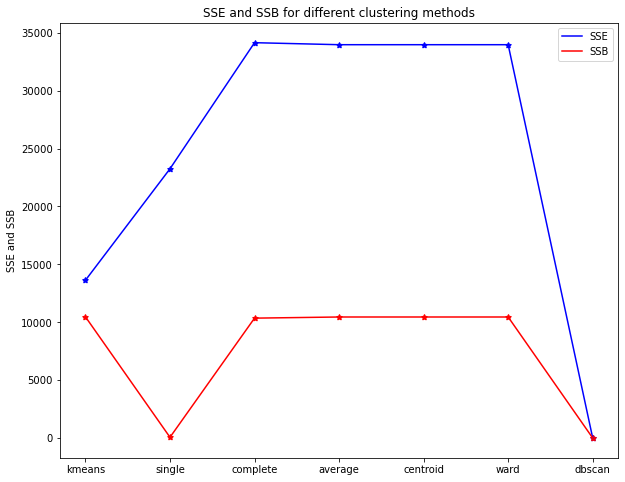

In [67]:
#kmeans, hierarchical and dbscan for k=2 w/ Simulated Data
k = 2
SSE, SSB = [], []
newDF = pd.DataFrame(data)
newDF = list(newDF.loc[:, 'Unnamed: 0'])

# --kmeans--
k_means = cluster.KMeans(n_clusters=k).fit(df)
kmLabels = k_means.labels_
SSE.append(kSSE[1])
SSB.append(kSSB[1])

# --hierarchial complete--
cSingle = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single').fit(df)
singleLabels = cSingle.labels_
sPred = cSingle.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, sPred)
centroids = clf.centroids_
clustLabels = singleLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum) 


# --hierarchial complete--
cComplete = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete').fit(df)
completeLabels = cComplete.labels_
cPred = cComplete.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, cPred)
centroids = clf.centroids_
clustLabels = completeLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)

# --hierarchial average--
cAverage = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average').fit(df)
averageLabels = cAverage.labels_
aPred = cAverage.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, aPred)
centroids = clf.centroids_
clustLabels = averageLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)  

# --hierarchial centroid--
cCentroid = AgglomerativeClustering(n_clusters=k, affinity='euclidean').fit(df)
centroidLabels = cCentroid.labels_
pred = cCentroid.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, pred)
centroids = clf.centroids_
clustLabels = centroidLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)

# --hierarchial ward--
cWard = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(df)
wardLabels = cWard.labels_
wPred = cWard.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, wPred)
centroids = clf.centroids_
clustLabels = wardLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)

# --dbScan--
db = DBSCAN(eps=10, min_samples=5).fit(df)
dbLabels = db.labels_
dbPred = db.fit_predict(df)
#couldn't get dbscan or NearestCentroid to work?
#sse
SSE.append(0)
#ssb
SSB.append(0)

# --clustering plot--
plt.figure(figsize=(10,8))
k = ['kmeans', 'single', 'complete', 'average', 'centroid', 'ward', 'dbscan']

for i in range(0, len(SSB)):
    plt.plot(k[i], SSE[i], color='blue', marker=(5, 1))
    plt.plot(k[i], SSB[i], color='red', marker=(5, 1))

plt.plot(k, SSE, label='SSE', color='blue')
plt.plot(k, SSB, label='SSB', color='red')
plt.title('SSE and SSB for different clustering methods')
plt.ylabel('SSE and SSB')
plt.legend()

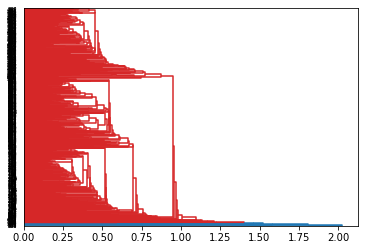

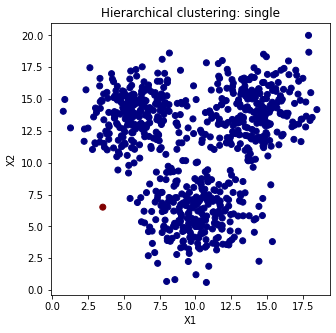

In [68]:
# --hierarchial single--
#dendogram is produced
cSingle = hierarchy.linkage(df, 'single')
dn = hierarchy.dendrogram(cSingle,orientation='right')

#cluster scatter plot is produced
fc = fcluster(cSingle, 2, criterion='maxclust')
plt.figure(figsize=(5,5))
plt.title('Hierarchical clustering: single')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df['X1'],df['X2'],c=fc, cmap='jet')

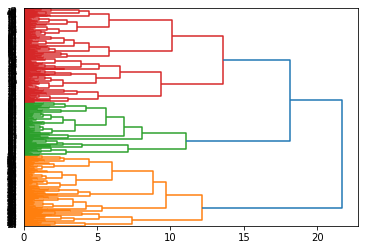

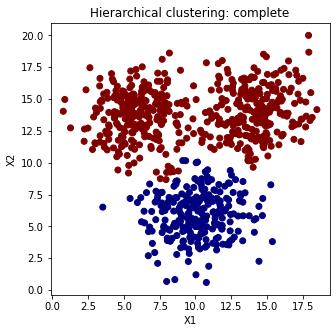

In [69]:
# --hierarchial complete--
#dendogram is produced
cComplete = hierarchy.linkage(df, 'complete')
dn = hierarchy.dendrogram(cComplete,orientation='right')

#cluster scatter plot is produced
fc = fcluster(cComplete, 2, criterion='maxclust')
plt.figure(figsize=(5,5))
plt.title('Hierarchical clustering: complete')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df['X1'],df['X2'],c=fc, cmap='jet')

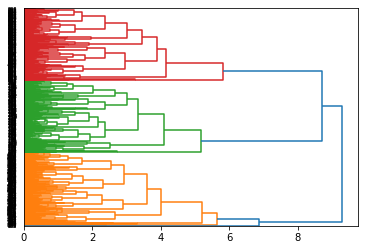

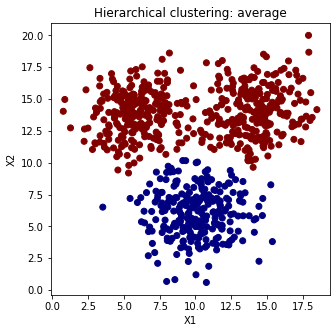

In [70]:
# --hierarchial average--
#dendogram is produced
cAverage = hierarchy.linkage(df, 'average')
dn = hierarchy.dendrogram(cAverage,orientation='right')

#cluster scatter plot is produced
fc = fcluster(cAverage, 2, criterion='maxclust')
plt.figure(figsize=(5,5))
plt.title('Hierarchical clustering: average')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df['X1'],df['X2'],c=fc, cmap='jet')

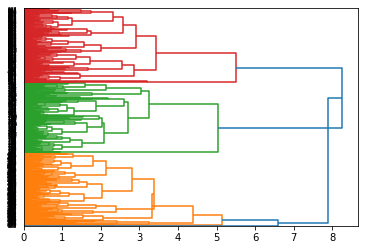

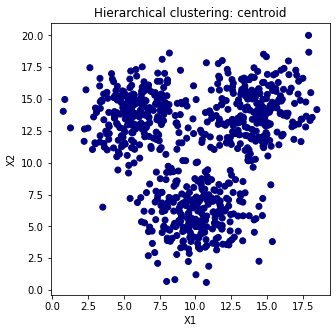

In [71]:
# --hierarchial centroid--
#dendogram is produced
cCentroid = hierarchy.linkage(df, 'centroid')
dn = hierarchy.dendrogram(cCentroid,orientation='right')

#cluster scatter plot is produced
fc = fcluster(cCentroid, 2, criterion='maxclust')
plt.figure(figsize=(5,5))
plt.title('Hierarchical clustering: centroid')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df['X1'],df['X2'],c=fc, cmap='jet')

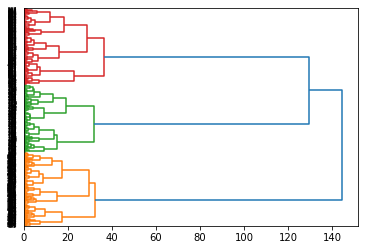

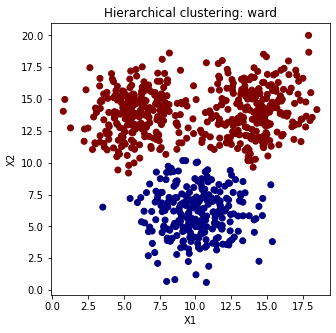

In [72]:
# --hierarchial ward--
#dendogram is produced
cWard = hierarchy.linkage(df, 'ward')
dn = hierarchy.dendrogram(cWard,orientation='right')

#cluster scatter plot is produced
fc = fcluster(cWard, 2, criterion='maxclust')
plt.figure(figsize=(5,5))
plt.title('Hierarchical clustering: ward')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df['X1'],df['X2'],c=fc, cmap='jet')

Text(0, 0.5, 'X2')

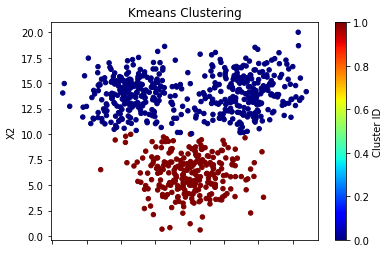

In [96]:
# --kmeans--
k_means = cluster.KMeans(n_clusters=2).fit(df)
labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
result = pd.concat((data, labels), axis=1)
result.plot.scatter(x='X1',y='X2',c='Cluster ID', cmap='jet')
plt.title('Kmeans Clustering')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

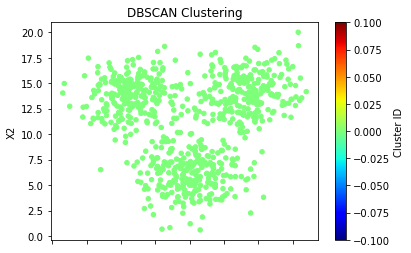

In [95]:
# --dbscan--
db = DBSCAN(eps=15.5, min_samples=5).fit(df)
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
result = pd.concat((data, labels), axis=1)
result.plot.scatter(x='X1',y='X2',c='Cluster ID', cmap='jet')
plt.title('DBSCAN Clustering')
plt.xlabel('X1')
plt.ylabel('X2')

In [74]:
print('My Conclusion: ')
print('Based on these clustering results, it appears that ward and average are the best for')
print('telling apart two different clusters while the others have some overlap and error.')
print('**side note again: clustering is still difficult')

My Conclusion: 
Based on these clustering results, it appears that ward and average are the best for
telling apart two different clusters while the others have some overlap and error.
**side note again: clustering is difficult
